In [3]:
!pip install kaggle


### First Create the Kaggle API key (this is free)
### Upload to the Google Co-lab and run below code

In [4]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')


### Download the Cell Image Dataset

In [5]:
!kaggle datasets download arifmia/cell-image-classification


Dataset URL: https://www.kaggle.com/datasets/arifmia/cell-image-classification
License(s): MIT
 98% 331M/338M [00:03<00:00, 80.3MB/s]
100% 338M/338M [00:03<00:00, 107MB/s] 


### This wiill unzip the downloaded zip file

In [6]:
!unzip cell-image-classification.zip


Streaming output truncated to the last 5000 lines.
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142452_cell_245.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142452_cell_251.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142452_cell_261.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142452_cell_41.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142452_cell_54.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142452_cell_57.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142452_cell_85.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142730_cell_104.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142730_cell_109.png  
  inflating: Cell_image_dataset/train/uninfected/C228ThinF_IMG_20151112_142730_cell_128.png  
  inflating: 

### Let See how the data look like

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

In [2]:
parasite_path  = r"/content/Cell_image_dataset/train/parasitized"
unparasite_path = r"/content/Cell_image_dataset/train/uninfected"

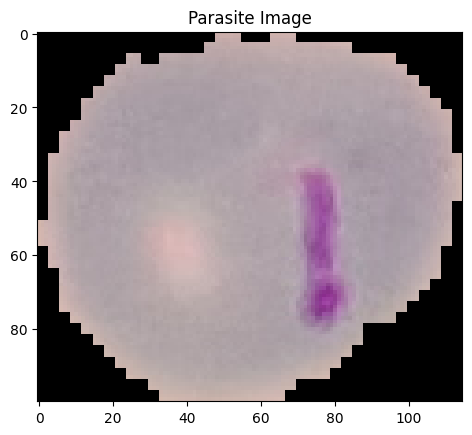

In [4]:
for i in os.listdir(parasite_path):
  img = mpimg.imread(os.path.join(parasite_path, i))
  plt.imshow(img)
  plt.title("Parasite Image")
  plt.show()
  break

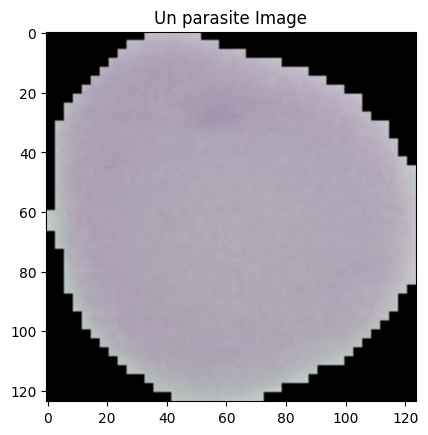

In [5]:
for i in os.listdir(unparasite_path):
  img = mpimg.imread(os.path.join(unparasite_path, i))
  plt.imshow(img)
  plt.title("Un parasite Image")
  plt.show()
  break

### Now We Going to Start with Dataset creation with corresponding label

####  This dataset for the CNN

In [1]:
import numpy as np
from PIL import Image

In [12]:
dataset = []  # stores the pixel value
labels = []  # stores the label

In [13]:
print(f' Length of dataset: {len(dataset)} Length of labels: {len(labels)}')

 Length of dataset: 0 Length of labels: 0


In [14]:
## defining a function that stores the pixel value of images with corresponding label

def CreateDataSet(curr_path,label):
  for i in os.listdir(curr_path):
    if i.endswith(('.png', '.jpg', '.jpeg')):
      img_path = os.path.join(curr_path, i)
      img = Image.open(img_path)
      img = img.resize((64, 64))
      dataset.append(np.array(img) / 255.0)
      labels.append(label)

In [15]:
## For Unparasite cell
CreateDataSet(unparasite_path,0)


In [16]:
print(f' Length of dataset: {len(dataset)} Length of labels: {len(labels)}')

 Length of dataset: 12479 Length of labels: 12479


In [17]:
# for parasite cell
CreateDataSet(parasite_path,1)

In [18]:
print(f' Length of dataset: {len(dataset)} Length of labels: {len(labels)}')

 Length of dataset: 24958 Length of labels: 24958


In [19]:
print(f'First Image  Unique Pixel Value Value: {np.unique(dataset[0])} and label is: {labels[0]}')

First Image  Unique Pixel Value Value: [0.         0.00392157 0.00784314 0.01176471 0.01568627 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313725
 0.04705882 0.05098039 0.0627451  0.06666667 0.07058824 0.07843137
 0.08235294 0.08627451 0.09019608 0.09411765 0.09803922 0.10196078
 0.10588235 0.10980392 0.11372549 0.11764706 0.12156863 0.1254902
 0.12941176 0.13333333 0.1372549  0.14117647 0.14509804 0.15686275
 0.16078431 0.16470588 0.16862745 0.17254902 0.17647059 0.18431373
 0.18823529 0.19215686 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568627 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313725 0.24705882 0.25098039 0.25490196
 0.25882353 0.2627451  0.26666667 0.27058824 0.2745098  0.27843137
 0.28235294 0.28627451 0.29019608 0.29803922 0.30196078 0.30588235
 0.31372549 0.31764706 0.32156863 0.3254902  0.32941176 0.33333333
 0.3372549  0.34117647 0.34509804 0.34901961 0.35294118 0.35686275
 0.36078431 0.36470588 0

In [20]:
print(f' Type of dataset{ type(dataset)} and type of labels {type(labels)}')

 Type of dataset<class 'list'> and type of labels <class 'list'>


In [21]:
dataset = np.array(dataset)
labels = np.array(labels)

In [22]:
print(f' Type of dataset{ type(dataset)} and type of labels {type(labels)}')

 Type of dataset<class 'numpy.ndarray'> and type of labels <class 'numpy.ndarray'>


In [23]:
dataset.shape , labels.shape

((24958, 64, 64, 3), (24958,))

In [24]:
labels

array([0, 0, 0, ..., 1, 1, 1])

### Prepare validation dataset

In [6]:
val_unpari = r"/content/Cell_image_dataset/test/uninfected"
val_pari = r"/content/Cell_image_dataset/test/parasitized"

In [26]:
val_dataset = []
val_labels = []

In [27]:
def CreateDataSet2(curr_path,label):
  for i in os.listdir(curr_path):
    if i.endswith(('.png', '.jpg', '.jpeg')):
      img_path = os.path.join(curr_path, i)
      img = Image.open(img_path)
      img = img.resize((64, 64))
      val_dataset.append(np.array(img) / 255.0)
      val_labels.append(label)

CreateDataSet2(val_unpari,0)
CreateDataSet2(val_pari,1)

val_dataset = np.array(val_dataset)
val_labels = np.array(val_labels)

In [28]:
print(f' Length of dataset: {len(val_dataset)} Length of labels: {len(val_labels)}')

 Length of dataset: 2600 Length of labels: 2600


#### Vgg16 DATASET
- As Vgg16 require the (224,224,3) Image size we create new dataset here

In [ ]:
vgg_dataset = []
vgg_labels = []
vgg_validation_dataset = []
vgg_validation_labels = []


def CreateVgg(curr_path,label,t):
  for i in os.listdir(curr_path):
    if i.endswith(('.png', '.jpg', '.jpeg')):
      img_path = os.path.join(curr_path, i)
      img = Image.open(img_path)
      img = img.resize((224, 224))
      if(t == "train"):
        vgg_dataset.append(np.array(img) / 255.0)
        vgg_labels.append(label)
      elif(t =="validation"):
        vgg_validation_dataset.append(np.array(img) / 255.0)
        vgg_validation_labels.append(label)



CreateVgg(unparasite_path,0,"train")
CreateVgg(parasite_path,1,"train")

CreateVgg(val_unpari,0,"validation")
CreateVgg(val_pari,1,"validation")

### CNN

In [32]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation ='relu',input_shape=(64,64,3)))   # 32 is the number of filter, (3,3) filter size , activation function is relu because relu generally did not have vanishing gradient you can also use leaky relu also if relu show vanishing gradient(some cases when network is very deep)
model.add(layers.MaxPooling2D(2,2));                                          # (64,64,3) is the image  size with 3 rgb channel

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2));

model.add(layers.Conv2D(64,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2));

model.add(layers.Conv2D(128,(3,3),activation ='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D(2,2));

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 130,176 (508.50 KB)

 Trainable params: 130,176 (508.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten()) # flatten the layer so model able to take the input
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5)) # to reduce the overfitting
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation = 'sigmoid')) # it is multi class classfication so we use softmax activation function


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 499,841 (1.91 MB)

 Trainable params: 499,841 (1.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    dataset, labels,
    epochs=30,
    batch_size=32,
    verbose = 2,
    validation_data=(val_dataset, val_labels)
)


Epoch 1/30
780/780 - 21s - 27ms/step - accuracy: 0.8158 - loss: 0.3523 - val_accuracy: 0.9523 - val_loss: 0.1683
Epoch 2/30
780/780 - 8s - 10ms/step - accuracy: 0.9541 - loss: 0.1564 - val_accuracy: 0.9527 - val_loss: 0.1623
Epoch 3/30
780/780 - 4s - 5ms/step - accuracy: 0.9565 - loss: 0.1462 - val_accuracy: 0.9508 - val_loss: 0.1575
Epoch 4/30
780/780 - 5s - 7ms/step - accuracy: 0.9571 - loss: 0.1401 - val_accuracy: 0.9500 - val_loss: 0.1420
Epoch 5/30
780/780 - 6s - 7ms/step - accuracy: 0.9579 - loss: 0.1320 - val_accuracy: 0.9523 - val_loss: 0.1383
Epoch 6/30
780/780 - 5s - 6ms/step - accuracy: 0.9592 - loss: 0.1288 - val_accuracy: 0.9542 - val_loss: 0.1349
Epoch 7/30
780/780 - 5s - 7ms/step - accuracy: 0.9593 - loss: 0.1239 - val_accuracy: 0.9465 - val_loss: 0.1461
Epoch 8/30
780/780 - 5s - 6ms/step - accuracy: 0.9613 - loss: 0.1177 - val_accuracy: 0.9538 - val_loss: 0.1394
Epoch 9/30
780/780 - 5s - 6ms/step - accuracy: 0.9619 - loss: 0.1164 - val_accuracy: 0.9512 - val_loss: 0.141

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("Training Accuracy:", train_accuracy[-1] * 100)
print("Validation Accuracy:", val_accuracy[-1] * 100)

Training Accuracy: 97.9365348815918
Validation Accuracy: 95.03846168518066


82/82 - 0s - 3ms/step - accuracy: 0.9504 - loss: 0.1881


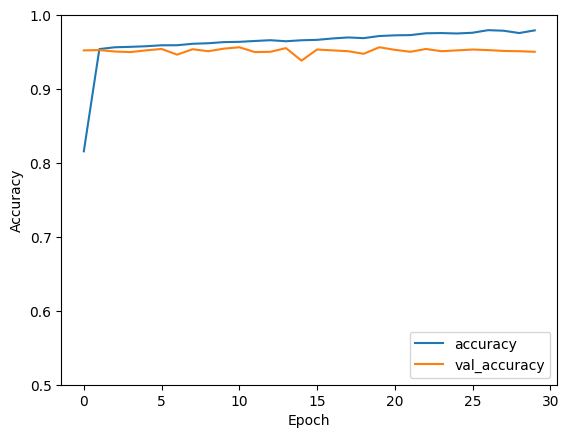

In [ ]:
plt.plot(history.history['accuracy'], label= 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(val_dataset,val_labels, verbose=2)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Confusion Matrix:
[[1247   53]
 [  76 1224]]


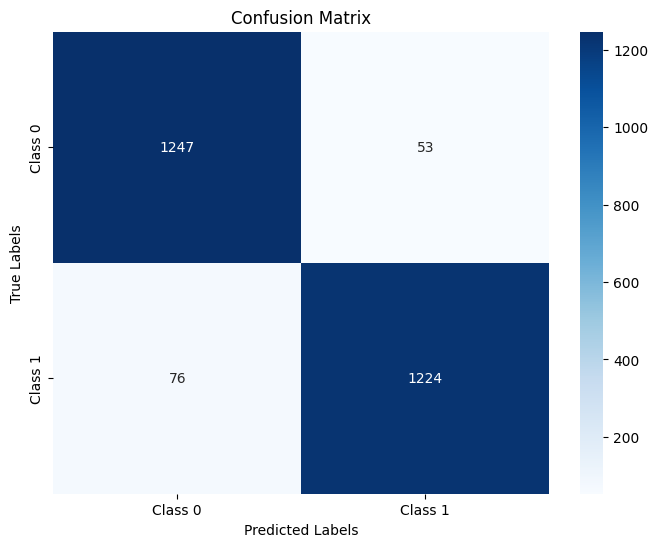


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1300
           1       0.96      0.94      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


y_pred_prob = model.predict(val_dataset)


y_pred = (y_pred_prob > 0.5).astype(int).flatten()


conf_matrix = confusion_matrix(val_labels, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(val_labels, y_pred))


In [ ]:
## Let Save The Cnn Based model
model.save("CNN_Based_Cell_Parasite.keras")

## VGG16
#### (Transfer Learning) i.e using pre trained model and  add more layer to train our model

In [29]:
from tensorflow.keras.applications import VGG16

In [30]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [33]:
base_model.trainable = False  ## we do not want to train the pre trained weights

vgg16 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

In [34]:
vgg16.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,830,593 (60.39 MB)

 Trainable params: 1,115,905 (4.26 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [35]:
vgg16.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
dataset.shape

(24958, 64, 64, 3)

In [ ]:
vgg16_train = vgg16.fit(vgg_dataset, vgg_labels,
                    validation_data=(vgg_validation_dataset, vgg_validation_labels),
                    epochs=10,
                    batch_size=32)

- Slightly increase in the training Accuracy
- But Validation Accuracy remain the Same

In [ ]:
train_accuracy = vgg16_train.history['accuracy']
val_accuracy = vgg16_train.history['val_accuracy']

print("Training Accuracy:", train_accuracy[-1] * 100)
print("Validation Accuracy:", val_accuracy[-1] * 100)

Training Accuracy: 98.91017079353333
Validation Accuracy: 95.15384435653687


In [ ]:
y_pred_prob = vgg16.predict(vgg_validation_dataset)


y_pred = (y_pred_prob > 0.5).astype(int).flatten()


conf_matrix = confusion_matrix(vgg_validation_labels, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(val_labels, y_pred))

- The model is overfitted as it work fabulous on train data but give less accuracy on unseen data